<a href="https://colab.research.google.com/github/Eric428-a/DataAnalysisProject/blob/main/Affairs_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPALANOTORY DATA ANALYSIS

In [9]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the Data
df = pd.read_csv('/content/affairs.csv')

In [111]:
# Explain Intentions: Display information of the dataframe

In [107]:
print("DataFrame Information:")

DataFrame Information:


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6366 non-null   int64  
 1   rate_marriage    6366 non-null   int64  
 2   age              6366 non-null   float64
 3   yrs_married      6366 non-null   float64
 4   children         6366 non-null   float64
 5   religious        6366 non-null   int64  
 6   educ             6366 non-null   int64  
 7   occupation       6366 non-null   int64  
 8   occupation_husb  6366 non-null   int64  
 9   affairs          6366 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 497.5 KB
None


In [110]:
# Explain Intentions: Display summary statistics of the dataframe

In [109]:
print("\nSummary Statistics:")


Summary Statistics:


In [14]:
print(df.describe())

        Unnamed: 0  rate_marriage          age  yrs_married     children  \
count  6366.000000    6366.000000  6366.000000  6366.000000  6366.000000   
mean   3182.500000       4.109645    29.082862     9.009425     1.396874   
std    1837.850239       0.961430     6.847882     7.280120     1.433471   
min       0.000000       1.000000    17.500000     0.500000     0.000000   
25%    1591.250000       4.000000    22.000000     2.500000     0.000000   
50%    3182.500000       4.000000    27.000000     6.000000     1.000000   
75%    4773.750000       5.000000    32.000000    16.500000     2.000000   
max    6365.000000       5.000000    42.000000    23.000000     5.500000   

         religious         educ   occupation  occupation_husb      affairs  
count  6366.000000  6366.000000  6366.000000      6366.000000  6366.000000  
mean      2.426170    14.209865     3.424128         3.850141     0.705374  
std       0.878369     2.178003     0.942399         1.346435     2.203374  
min    

In [113]:
# Visualize the Data

In [114]:
print("\nVisualizing Data:")


Visualizing Data:


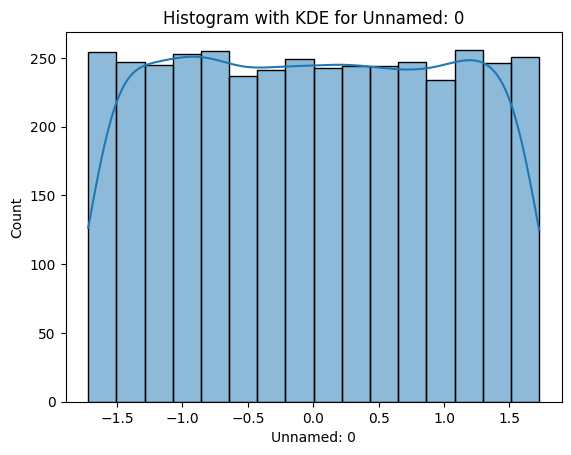

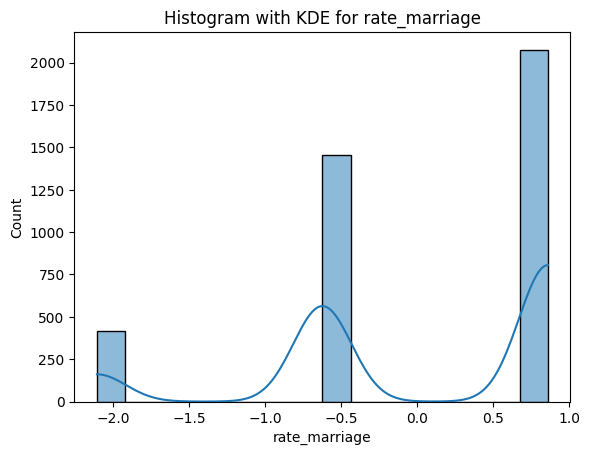

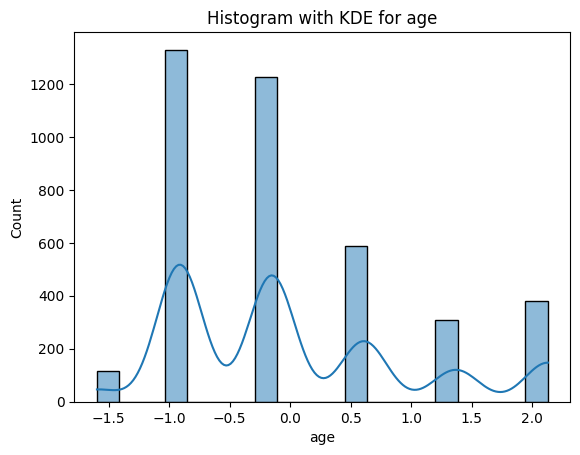

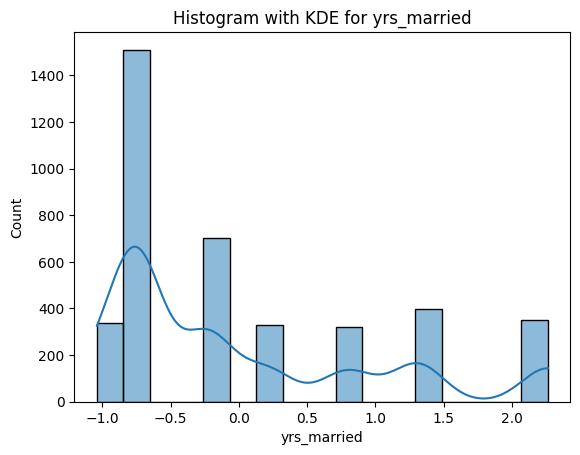

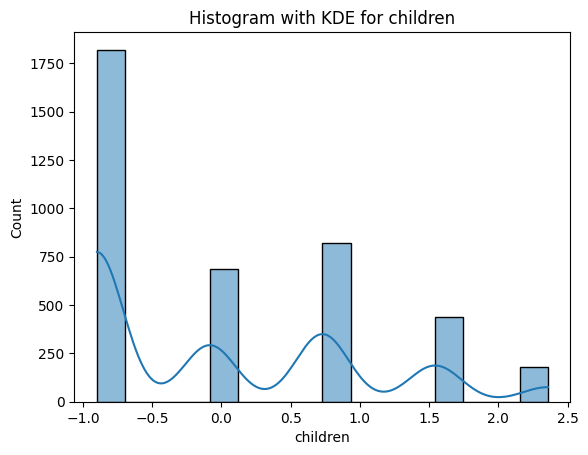

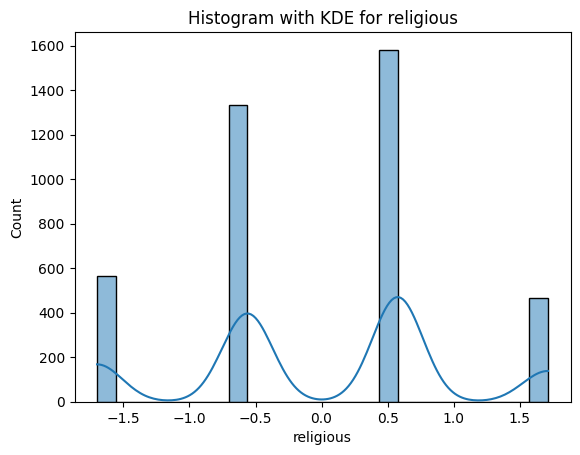

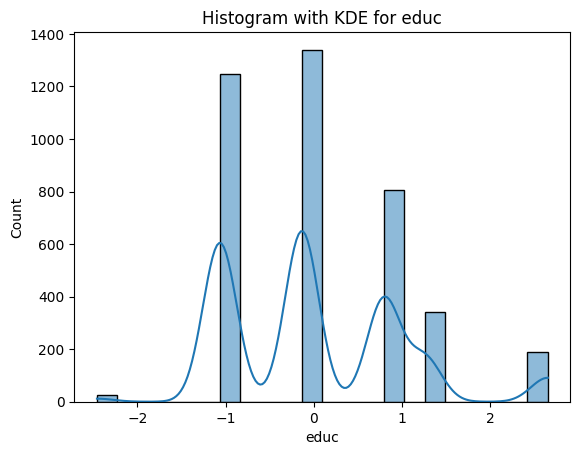

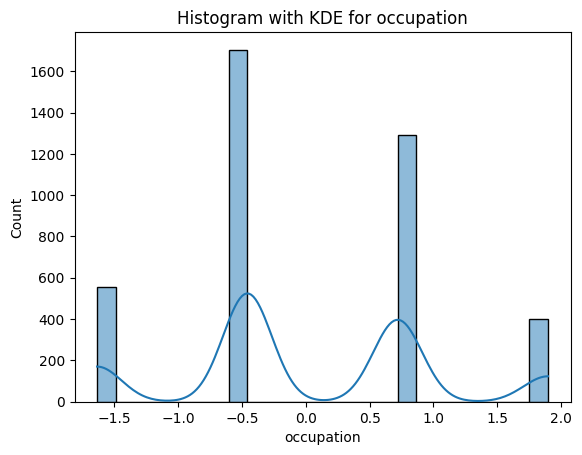

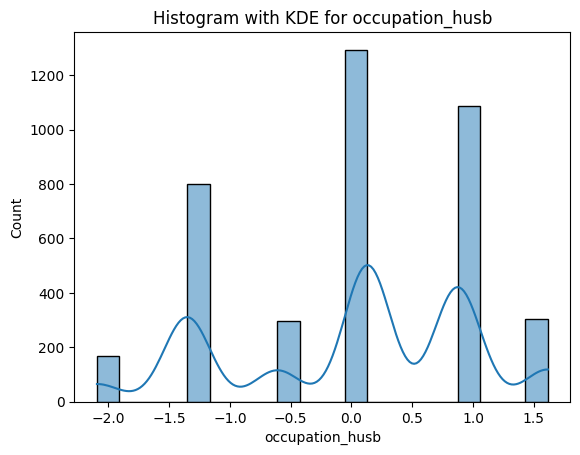

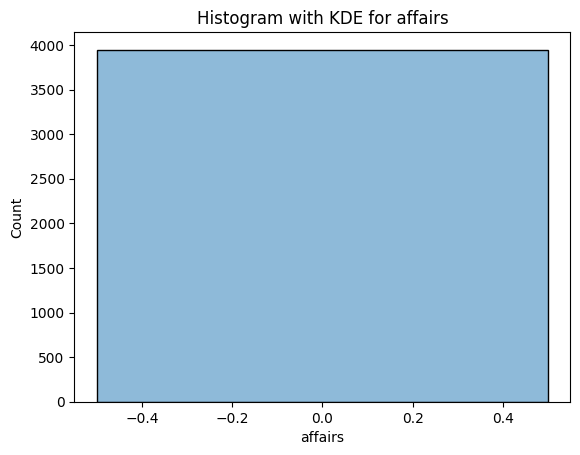

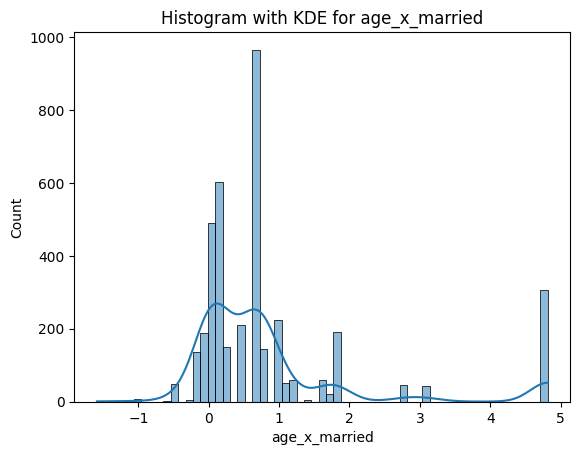

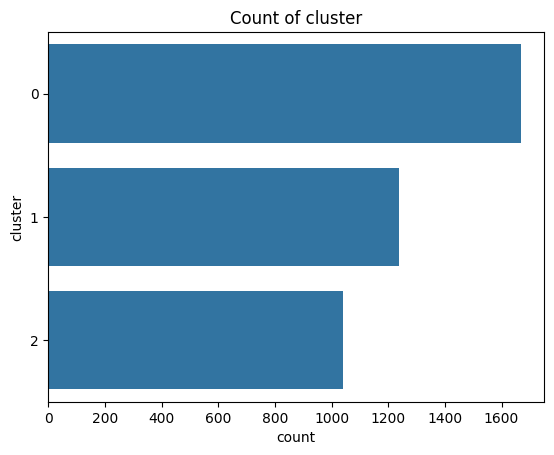

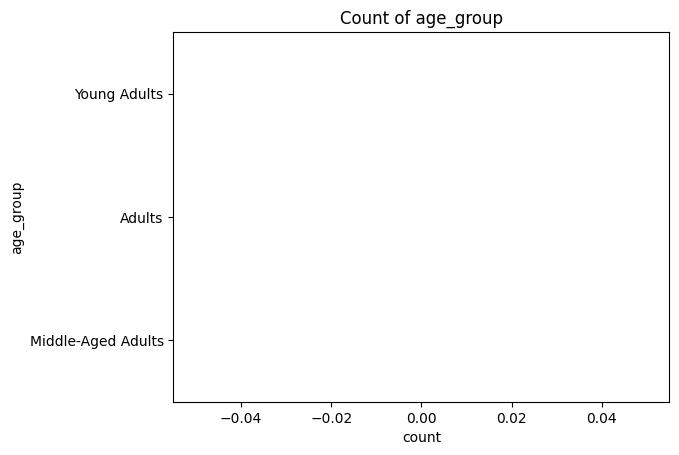

In [112]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column], kde=True)
        plt.title(f"Histogram with KDE for {column}")
    else:
        sns.countplot(y=column, data=df)
        plt.title(f"Count of {column}")
    plt.show()

In [116]:
# Check for Missing Values

In [115]:
print("\nMissing Values:")


Missing Values:


In [17]:
missing_values = df.isnull().sum()  # Count missing values in each column

In [18]:
print(missing_values)

Unnamed: 0         0
rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64


In [118]:
# Check for Duplicate Values

In [117]:
print("\nDuplicate Values:")


Duplicate Values:


In [20]:
duplicate_entries = df.duplicated().sum()  # Count duplicate rows

In [21]:
print(duplicate_entries)

0


In [40]:
# Handle Missing Values

In [41]:
print("\nHandling Missing Values:")


Handling Missing Values:


In [42]:
df.fillna(df.mean(), inplace=True)  # Fill missing values with column means

In [43]:
# Remove Duplicate Values

In [44]:
print("\nRemoving Duplicate Values:")


Removing Duplicate Values:


In [45]:
df.drop_duplicates(inplace=True)  # Remove duplicate rows

In [25]:
# Handle Categorical Variables
df = pd.get_dummies(df, drop_first=True)  # Convert categorical variables into dummy/indicator variables

In [47]:
# Outlier Detection

In [46]:
print("\nOutlier Detection:")


Outlier Detection:


In [48]:
Q1 = df.quantile(0.25)  # First quartile

In [28]:
Q3 = df.quantile(0.75)  # Third quartile

In [29]:
IQR = Q3 - Q1  # Interquartile range

In [30]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]  # Remove outliers

In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)  # Standardize features by removing the mean and scaling to unit variance

In [120]:
# Check Data Distribution

In [121]:
print("\nData Distribution:")


Data Distribution:


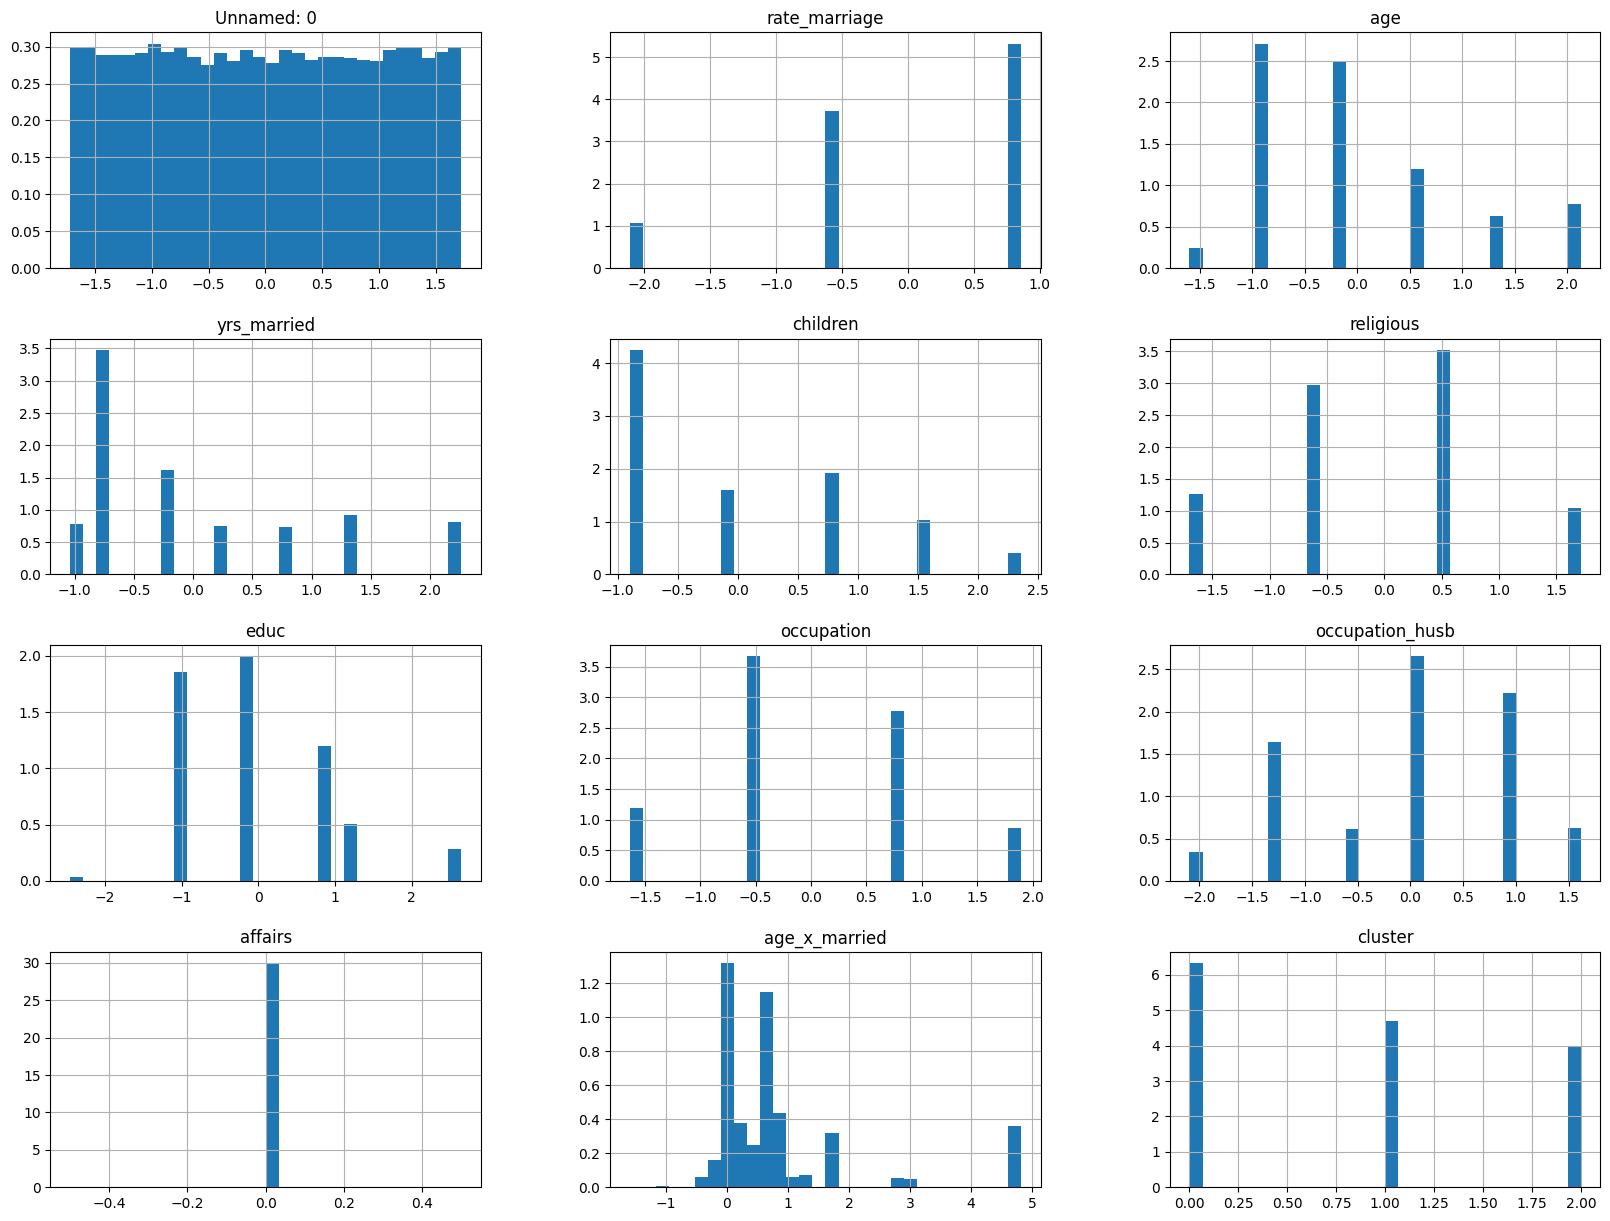

In [119]:
df.hist(bins=30, figsize=(20,15), density=True)
plt.show()

In [123]:
# Check Correlations

In [124]:
print("\nCorrelation Heatmap:")


Correlation Heatmap:


<ipython-input-122-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


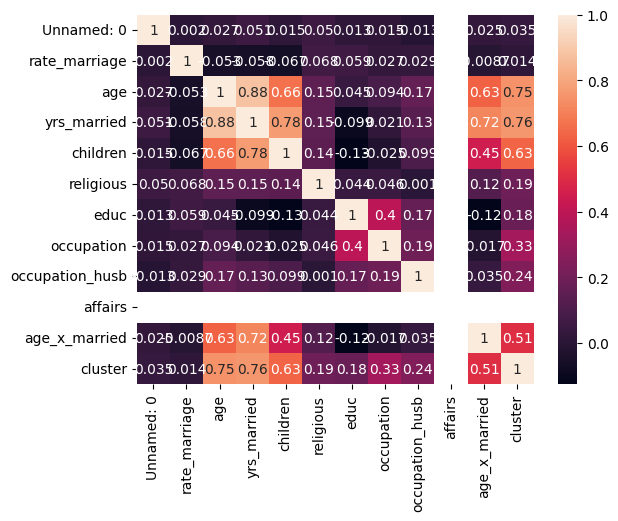

In [122]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# POSSIBLE TASKS FROM THE DATASET

# 1.*PREDICTIVE MODELING *

In [49]:
# Predictive Modeling: Classification

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
# Splitting data into features and target variable

In [54]:
X = df.drop('affairs', axis=1)

In [55]:
y = df['affairs']

In [56]:
# Splitting the dataset into the Training set and Test set

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Fitting Random Forest Classifier to the Training set

In [59]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [60]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Predicting the Test set results

In [62]:
y_pred = classifier.predict(X_test)

In [63]:
# Evaluating Model Accuracy

In [64]:
accuracy = accuracy_score(y_test, y_pred)

In [65]:
print("Classifier Accuracy:", accuracy)

Classifier Accuracy: 1.0


# *2.FEATURE ENGINEERING *

In [69]:
# Feature Engineering: Creating interaction terms and encoding categorical variables

In [67]:
df['age_x_married'] = df['age'] * df['yrs_married']

In [68]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [70]:
# Save feature-engineered file

In [71]:
df_encoded.to_csv('feature_engineered_data.csv', index=False)

# *3.ANOMALY DETECTION *

In [72]:
# Anomaly Detection: Identifying outliers using Isolation Forest

In [73]:
from sklearn.ensemble import IsolationForest

In [74]:
# Training the Isolation Forest model

In [75]:
iso_forest = IsolationForest(random_state=42)

In [76]:
iso_forest.fit(X)

IsolationForest(random_state=42)

In [77]:
# Predicting outliers

In [78]:
outliers = iso_forest.predict(X)

In [79]:
outliers_count = len(outliers[outliers == -1])

In [80]:
print("Number of outliers:", outliers_count)

Number of outliers: 1825


# *4.SEGMENTATION *

In [81]:
# Segmentation: K-means Clustering

In [82]:
from sklearn.cluster import KMeans

In [83]:
# Fitting K-means to the dataset

In [84]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [85]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [86]:
# Adding cluster labels to the dataframe

In [87]:
df['cluster'] = kmeans.labels_

In [88]:
# Analyzing cluster distribution

In [89]:
cluster_distribution = df['cluster'].value_counts()

In [90]:
print("Cluster Distribution:")

Cluster Distribution:


In [91]:
print(cluster_distribution)

0    1667
1    1238
2    1041
Name: cluster, dtype: int64


# *5. CUSTOMER PROFILING *

In [92]:
# Customer Profiling: Analyzing segments
# Analyze segments of individuals based on demographic or other characteristics
# Further analyze each segment to understand behaviors related to marriage and affairs
# This could be useful for targeted marketing or intervention strategies

In [93]:
# Segment the dataset into different groups based on demographic characteristics
# For example, let's segment based on age groups

In [94]:
# Define age groups

In [95]:
bins = [17, 25, 35, 45]  # Define age bins

In [96]:
labels = ['Young Adults', 'Adults', 'Middle-Aged Adults']  # Define labels for age groups

In [97]:
# Create a new column to store age group

In [98]:
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [99]:
# Analyze the likelihood of having affairs within each segment

In [100]:
segment_counts = df['age_group'].value_counts()

In [101]:
affair_likelihood = df.groupby('age_group')['affairs'].mean()

In [102]:
# Display the results

In [103]:
print("Segment Counts:")

Segment Counts:


In [104]:
print(segment_counts)

Young Adults          0
Adults                0
Middle-Aged Adults    0
Name: age_group, dtype: int64


In [105]:
print("\nLikelihood of Affairs by Age Group:")


Likelihood of Affairs by Age Group:


In [106]:
print(affair_likelihood)

age_group
Young Adults         NaN
Adults               NaN
Middle-Aged Adults   NaN
Name: affairs, dtype: float64
